# 선형회귀 데이터 로딩(보스턴 주택가격 데이터)


In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston() # 핑크글은 조만간 이 데이터를 지원하지 않는다

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

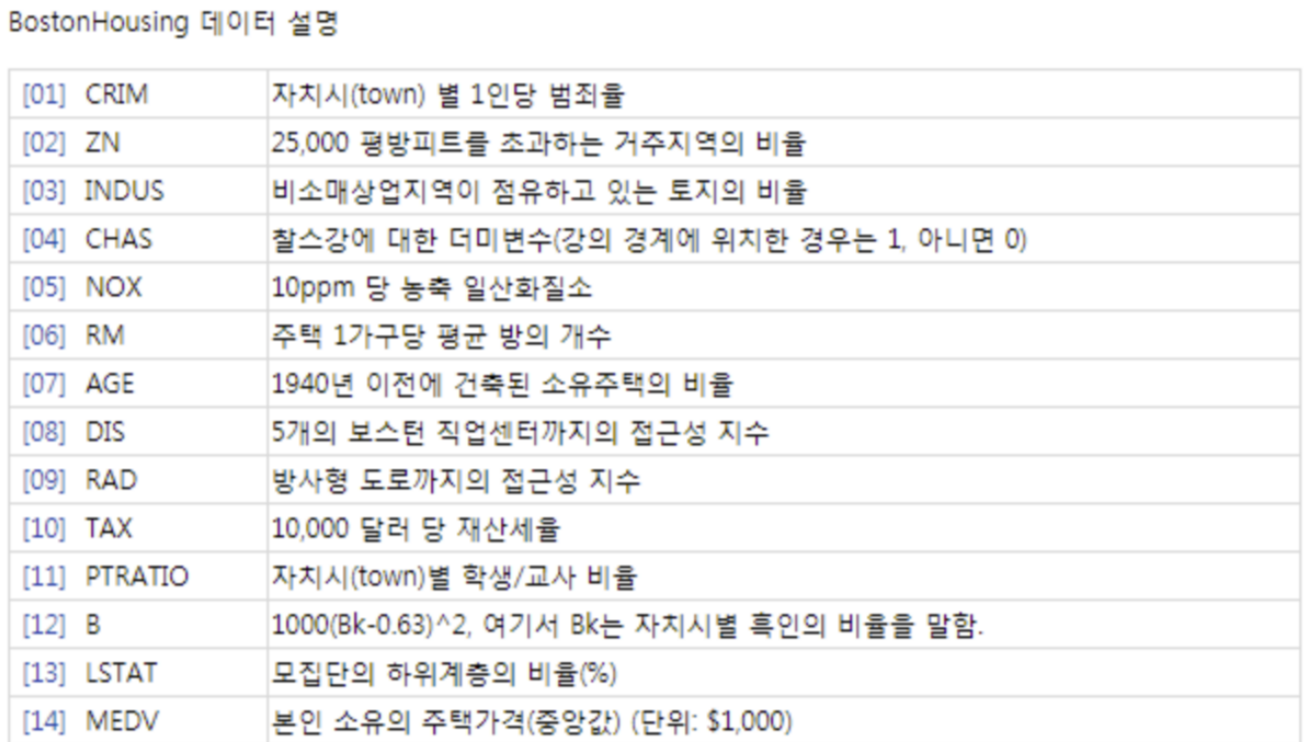

# 모델학습

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, # train_test_split는 기본적으로 랜덤 샘플링
                                                   random_state=722)

In [8]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [9]:
X_test.shape ,y_test.shape

((102, 13), (102,))

In [10]:
# 선형모델
from sklearn.linear_model import LinearRegression

In [11]:
# 모델학습
model = LinearRegression()
model.fit(X_train, y_train) # fit은 학습

LinearRegression()

In [12]:
# 학습된 가중치와 절편 확인
print("가중치 : ", model.coef_)
print("절편 : ", model.intercept_)

가중치 :  [-1.18313515e-01  5.20521053e-02  1.76355388e-02  4.11554414e+00
 -2.01952839e+01  2.93408084e+00  1.01479948e-02 -1.56497280e+00
  3.16556945e-01 -1.25687293e-02 -1.01868234e+00  6.75071633e-03
 -5.73138231e-01]
절편 :  45.72482696295275


@ 파란 숫자는 가중치 순서
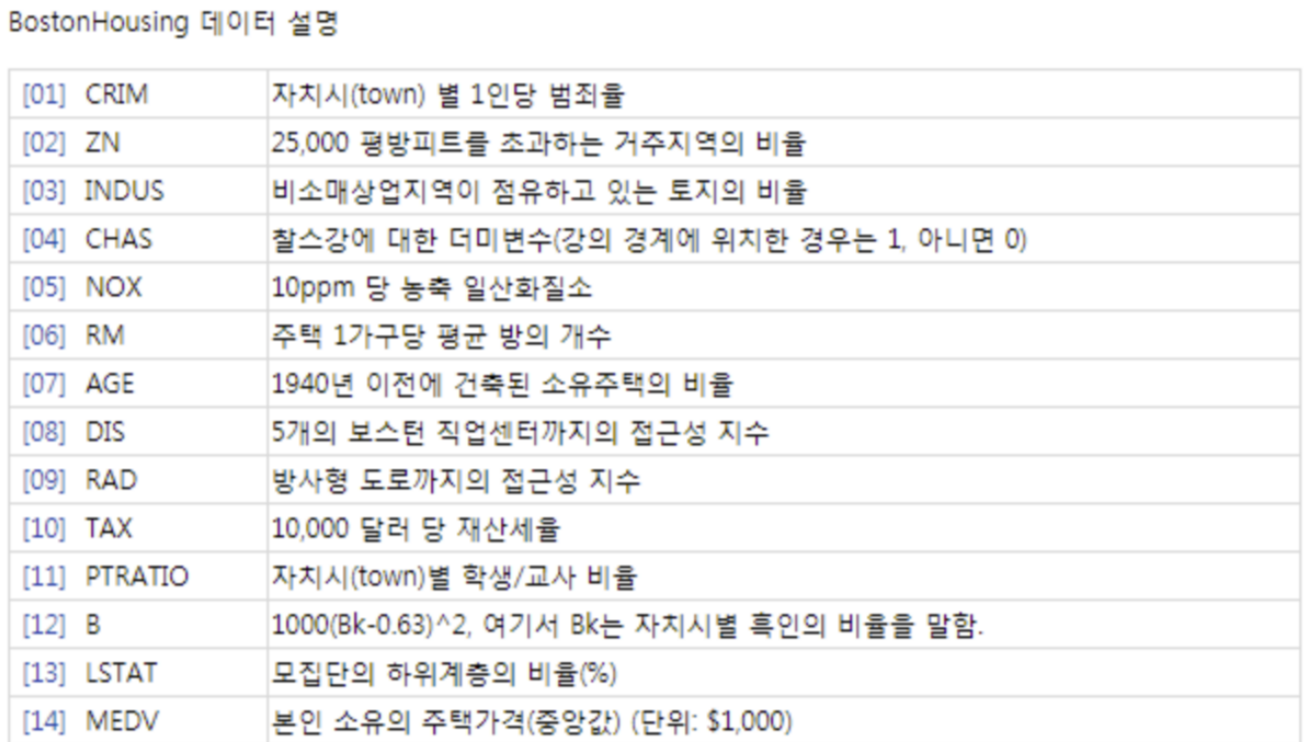

In [13]:
# 모델평가
model.score(X_test, y_test)# R square  점수 /  .score 자기만의 평가방식에 맞춰서 내장된 함수

0.7454536557439619

In [14]:
# (322p).참조
# MAE(MeanAbsoluteError)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것입니다.
# MSE(MeanSquaredError)이며 실제 값과 예측값의 차이를 제곱해 평균한 것입니다.
# RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류평균보다 더 커지는 특성이 있으므로 
# -------MSE에 루트를 씌운 것이 (RMSE/ Root Mean Squared Error)입니다.
# R square : 모든 값이 0~1사이값만 나옴 /1에가까울수록 모델링에 가깝게 잘했다.

In [15]:
# 다른 평가지표 사용
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE

In [16]:
pre = model.predict(X_test) # 예측값 생성
print("MAE : ", mean_absolute_error(y_test,pre))
print("MSE : ", mean_squared_error(y_test,pre))

MAE :  3.028568457448007
MSE :  17.925235768942024


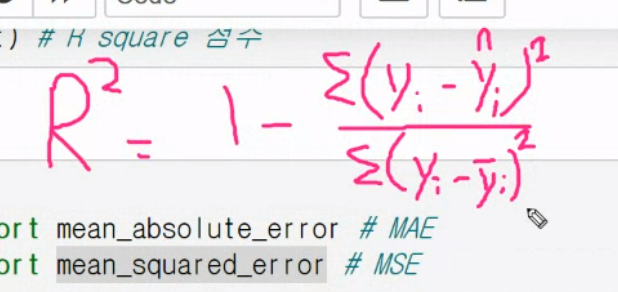

## 4. 다항 회귀
- 선형 모델의 수식에서 입력 특성에 2차항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다.

In [17]:
boston = load_boston()
boston.keys()

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [30]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [31]:
X_train, X_test, y_train,y_test = train_test_split(data, boston.target, random_state=726)

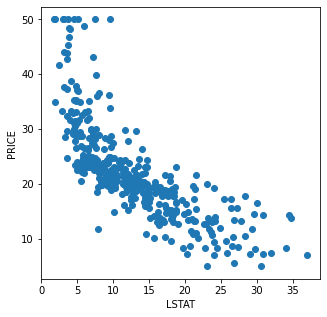

In [32]:
plt.figure(figsize = (5, 5)) # 가로, 세로의 크기
plt.scatter(X_train['LSTAT'], y_train)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

- LSTAT(하위계층의 비율)가 증가할 수록 PRICE(집 가격) 감소

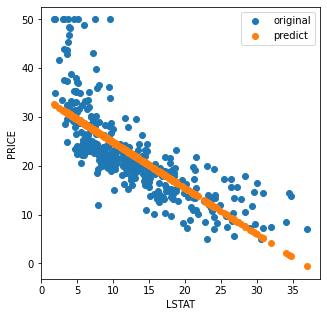

In [33]:
plt.figure(figsize = (5, 5)) # 가로, 세로의 크기
plt.scatter(X_train['LSTAT'], y_train, label='original')

# 선형모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']], y_train)

# 선형모델의 예측 결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train[['LSTAT']], pre, label = 'predict')

plt.legend() # 범례
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

## 다항 회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다.
2. sklearn의 PolynomialFeatures를 이용한다.

In [34]:
# 특성 확장
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']

In [35]:
# 모델 학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT','LSTAT x LSTAT']], y_train)

# 모델 예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

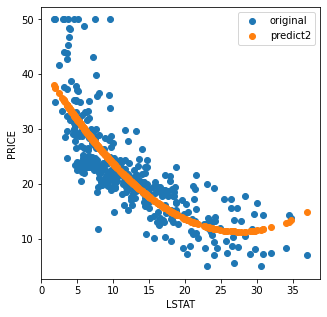

In [36]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original') # 오리지널 데이터
plt.scatter(X_train['LSTAT'], pre2, label = 'predict2') # 다항 회귀 결과
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()